In [1]:
#importing all the modules
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Importing the DataSet
data_set = pd.read_csv('C:/Users/mhkot/OneDrive/Desktop/creditcard.csv')
data_set

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


***Exploaratory Analysis***

In [3]:
# Checking the shape of the Dataset
data_set.shape

(284807, 31)

In [4]:
# Checking if there's any null/missing values in columns
round(100 * (data_set.isnull().sum()/len(data_set)),2).sort_values(ascending=False)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

In [5]:
data_set.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


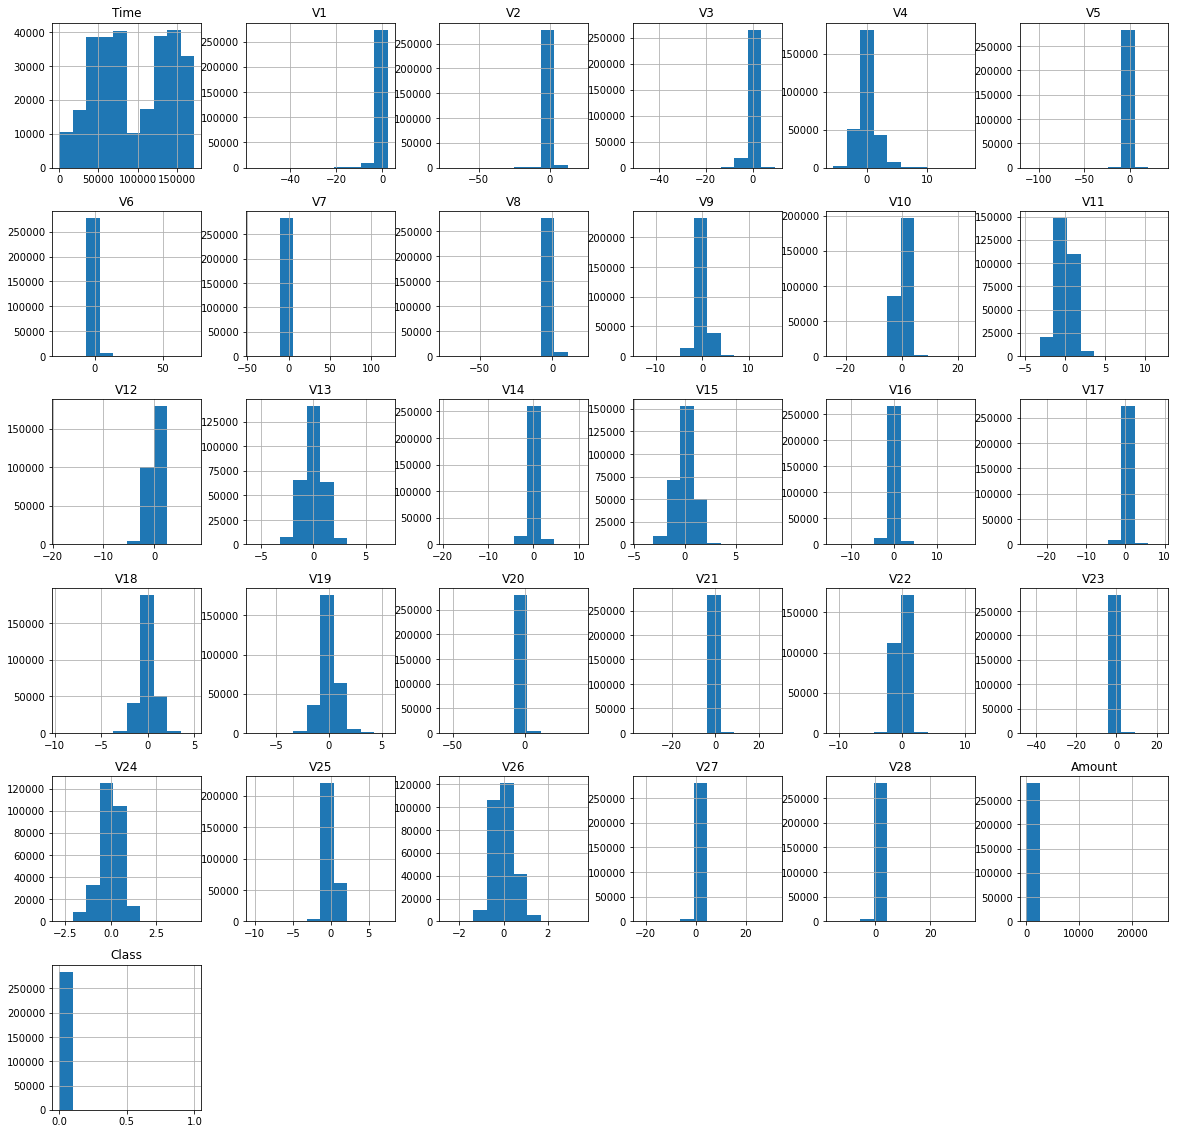

In [6]:
# Making Histogram for each feature
data_set.hist(figsize=(20,20))
plt.show()

In [7]:
# Getting Count Value for all th classes i.e. {1 : Fraud, 0 : Not Fraud}
data_set.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
# Getting a sample from the DataSet... Since 
data = data_set.sample(frac=0.1, random_state = 1)
data.shape

(28481, 31)

In [9]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

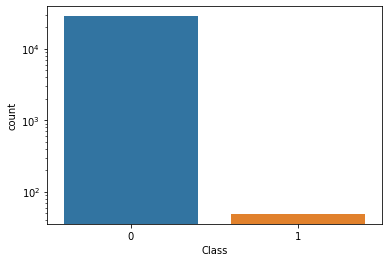

In [10]:
ax=sns.countplot(x='Class',data=data);
ax.set_yscale('log')

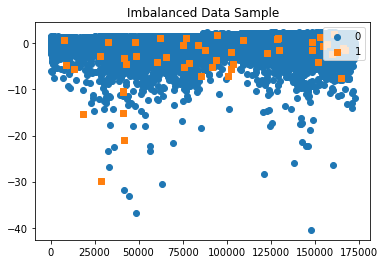

In [11]:
y=data['Class']
x=data.drop(['Class'], axis=1)
plot_2d_space(np.array(x), np.array(y), 'Imbalanced Data Sample')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)

In [12]:
stomek = SMOTETomek (sampling_strategy="all")
x_stomek, y_stomek = stomek.fit_resample(x_train, y_train)
x_stomek.shape,y_stomek.shape

((38682, 30), (38682,))

***K-Nearest Neighbors with Bagging Classifier***

Text(0.5, 1.0, 'Balanced Bagging - KNN')

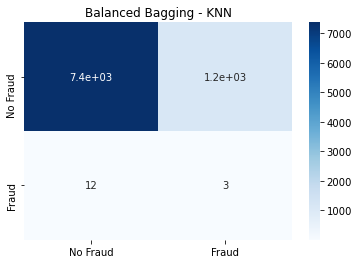

In [13]:
bbknn=BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),n_estimators=50,random_state=0,n_jobs=3)
bbknn.fit(x_stomek, y_stomek)
y_pred_bbk=bbknn.predict(x_test)
cm1=confusion_matrix(y_test, y_pred_bbk)
sns.heatmap(cm1, annot=True,
                    cmap=plt.cm.Blues,
                   xticklabels=['No Fraud', 'Fraud'],
                   yticklabels=['No Fraud', 'Fraud']).set_title('Balanced Bagging - KNN')

In [14]:
print(classification_report(y_test,y_pred_bbk))
print('Accuracy ==> ',accuracy_score(y_test,y_pred_bbk)*100)

              precision    recall  f1-score   support

           0       1.00      0.86      0.93      8530
           1       0.00      0.20      0.01        15

    accuracy                           0.86      8545
   macro avg       0.50      0.53      0.47      8545
weighted avg       1.00      0.86      0.92      8545

Accuracy ==>  86.23756582796958


In [15]:
#for K-nearest neighbors
TN=cm1[0,0] #true negative
TP=cm1[1,1] #true positive
FN=cm1[1,0] #flase negative
FP=cm1[0,1] #false positive
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print('The accuracy of the model = TP+TN/(TP+TN+FP+FN) =',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy \t\t=',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) \t=',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) \t=',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The accuracy of the model = TP+TN/(TP+TN+FP+FN) = 0.8623756582796958 
 The Missclassification = 1-Accuracy 		= 0.13762434172030424 
 Sensitivity or True Positive Rate = TP/(TP+FN) = 0.2 
 Specificity or True Negative Rate = TN/(TN+FP) = 0.8635404454865182 
 Positive Predictive value = TP/(TP+FP) 	= 0.002570694087403599 
 Negative predictive Value = TN/(TN+FN) 	= 0.9983735429655733 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.4656357388316155 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9264186804235678


***Random Forest Algorithm***

Text(0.5, 1.0, 'Balanced Bagging - Random forest')

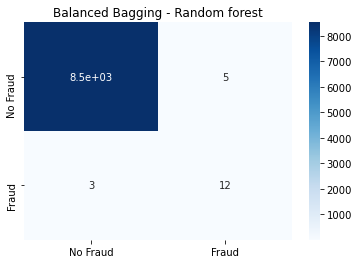

In [16]:
rfc_model= RandomForestClassifier(n_estimators = 100)
rfc_model.fit(x_stomek,y_stomek)
y_pred_rfc=rfc_model.predict(x_test)
cm2=confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm2, annot=True,
                    cmap=plt.cm.Blues,
                   xticklabels=['No Fraud', 'Fraud'],
                   yticklabels=['No Fraud', 'Fraud']).set_title('Balanced Bagging - Random forest')

In [17]:
print(classification_report(y_test,y_pred_rfc))
print('Accuracy ==> ',accuracy_score(y_test,y_pred_rfc)*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8530
           1       0.71      0.80      0.75        15

    accuracy                           1.00      8545
   macro avg       0.85      0.90      0.87      8545
weighted avg       1.00      1.00      1.00      8545

Accuracy ==>  99.90637799882973


In [18]:
#for Random Forest Algorithm
TN=cm2[0,0] #true negative
TP=cm2[1,1] #true positive
FN=cm2[1,0] #flase negative
FP=cm2[0,1] #false positive
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print('The accuracy of the model = TP+TN/(TP+TN+FP+FN) =',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy \t\t=',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) \t=',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) \t=',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The accuracy of the model = TP+TN/(TP+TN+FP+FN) = 0.9990637799882972 
 The Missclassification = 1-Accuracy 		= 0.000936220011702793 
 Sensitivity or True Positive Rate = TP/(TP+FN) = 0.8 
 Specificity or True Negative Rate = TN/(TN+FP) = 0.9994138335287222 
 Positive Predictive value = TP/(TP+FP) 	= 0.7058823529411765 
 Negative predictive Value = TN/(TN+FN) 	= 0.9996482176360225 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1364.7999999999856 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.20011730205278588


**Final Results**
> Accuracy
* K-Nearest Neighbors ==> 0.8482153306026916
* Random  Forest Algo ==> 0.9992978349912229

> Best Algorithm for the Credit Card Fraud Detection System ==> Random Forest Algorithm
